# Simulating SIER Model

## Importing Packages

In [1]:
from scipy.integrate import odeint
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt

In [3]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"
%matplotlib inline
plt.style.use('ggplot')

## SEIR Model

<font size="3">
    
It is a compartmental model consisting of 4 compartments- S: Susceptible, E: Exposed, I: Infected, R: Resistant

*  S is the number of susceptible individuals (those able to contract the disease),
*  E is the number of exposed individuals (those who have been infected but are not yet infectious),
*  I is the number of infective individuals (those capable of transmitting the disease),
*  R is the number of recovered individuals (those who have become immune).

</font>

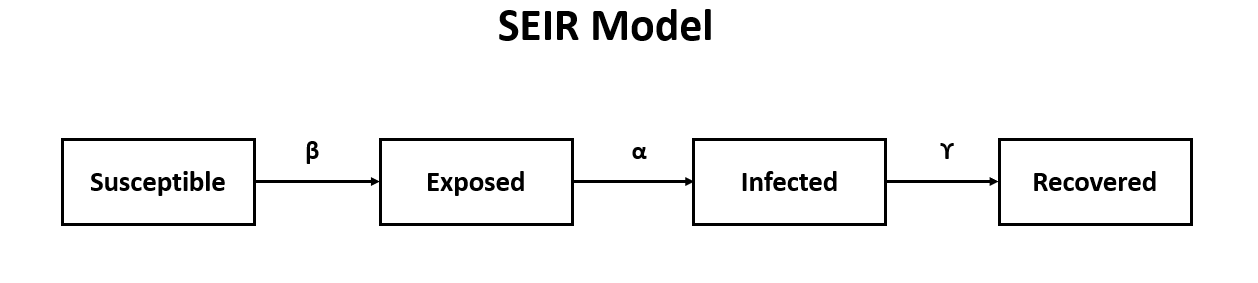

<font size="4">

***

<center><b>DEFINING  EQUATIONS</b></center>

***


$\frac{dS}{dt} = -\beta\frac{IS}{N}$


$\frac{dE}{dt} = \beta\frac{IS}{N} - \alpha E$


$\frac{dI}{dt} = \alpha E - \gamma I$


$\frac{dR}{dt} =  \gamma I$


$N = S + E + I + R $


$\frac{\beta}{\gamma} = R0$

</font>

<font size="3">

$\beta$ is the transmission rate constant

$\alpha$ is the inverse of average incubation time

$\gamma$ is the recovery rate constant

R0 is the basic reproduction number

</font>

In [4]:
def equations(initial_cond, t, beta, gamma, alpha):
    S, E, I, R = initial_cond
    N = S + E + I + R
    dsdt = -beta*I*S/N
    dedt = beta*I*S/N - alpha*E
    didt = alpha*E - gamma*I
    drdt = gamma*I
    
    return dsdt, dedt, didt, drdt

## Defining initial conditions

In [5]:
# parameter values
N = 382000000 #total population
R0 = 5 #basic reproduction number
t_incubation = 6.2 #incubation period
t_infective = 3.9 #infect


# initial number of susceptible exposed, infected and recovered individuals
E_0 = 1
I_0 = 1
R_0 = 0
S_0 = N - E_0 - I_0 - R_0

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

In [8]:
days = 200
tspan = np.arange(0, days, 1)
y0 = [S_0, E_0, I_0, R_0]

res = odeint(equations, y0, tspan, args=(beta, gamma, alpha))
s, e, i, r = res.T


In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=tspan, y=s, mode='lines+markers', name='Susceptible'))
fig.add_trace(go.Scatter(x=tspan, y=e, mode='lines+markers', name='Exposed'))
fig.add_trace(go.Scatter(x=tspan, y=i, mode='lines+markers', name='Infected'))
fig.add_trace(go.Scatter(x=tspan, y=r, mode='lines+markers',name='Recovered'))
    
if days <= 30:
    step = 1
elif days <= 90:
    step = 7
else:
    step = 30
    
#layout
fig.update_layout(title='Simulation of SEIR Model',
                       xaxis_title='Day',
                       yaxis_title='Counts',
                       title_x=0.1,
                      width=900, height=600
                     )
fig.update_xaxes(tickangle=-90, tickformat = None, tickmode='array', tickvals=np.arange(0, days + 1, step))
if not os.path.exists("images"):
    os.mkdir("images")
fig.show()